In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import matplotlib.pyplot as plt

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


In [13]:
mus = [70, 40, 30, 10, 2, 0, 1, 0]

data = np.random.poisson(lam=mus)
data

array([68, 36, 26, 14,  1,  0,  1,  0])

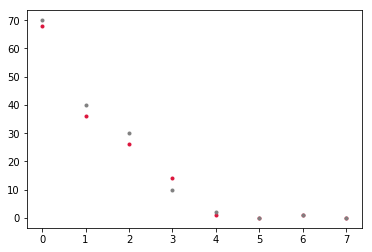

In [21]:
plt.plot(data, '.', color='crimson')
plt.plot(mus, '.', label='truth', color='gray')
None

In [24]:
model = pm.Model()
with model:
    mu = pm.HalfNormal('mu', sd=10, shape=len(mus))
    y = pm.Poisson('y', mu=mu, observed=data)

In [25]:
map_estimate = pm.find_MAP(model=model)
map_estimate

logp = -56.517, ||grad|| = 0.00080309: 100%|██████████| 43/43 [00:00<00:00, 1194.60it/s]  


{'mu': array([4.64365647e+01, 2.81022347e+01, 2.14145108e+01, 1.24499131e+01,
        9.90177098e-01, 6.24463338e-08, 9.90177098e-01, 6.24463338e-08]),
 'mu_log__': array([ 3.83808718e+00,  3.33584910e+00,  3.06406877e+00,  2.52171364e+00,
        -9.87146505e-03, -1.65889583e+01, -9.87146505e-03, -1.65889583e+01])}

In [26]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:05<00:00, 515.58draws/s]


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc5da90>,
      dtype=object)

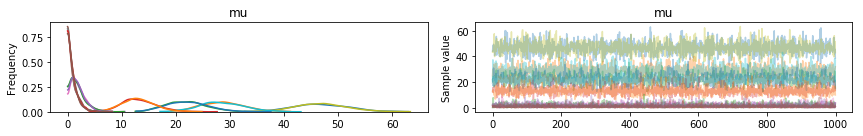

In [27]:
pm.traceplot(trace)